In [1]:
from DNAFlex.psf import GaussianPSF, hessian_analytical
from scipy.special import erf
import numpy as np

I0=500.0


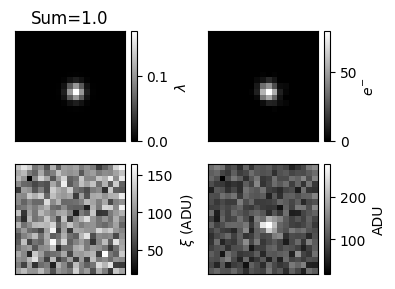

In [4]:
L = 19
omat = np.ones((L,L))
gain0 = 2.2
rmu0 = 100
rvar0 = 700
gain = gain0*omat #ADU/e-
rmu = rmu0*omat #ADU
rvar = rvar0*omat #ADU^2
pixel_size = 108.3 #nm
sigma = 0.22*640/1.4 #zhang 2007
sigma = sigma = sigma/pixel_size
lam0 = 1000 #cps
texp = 1 #seconds
eta = 0.5 #quantum efficiency
I0 = eta*lam0*texp #expected number of photons during exposure time (assume lam0 is determined for now)
x0,y0 = (10,10)

print(f'I0={I0}')
psf = GaussianPSF(x0,y0,L,I0,sigma,gain,rmu,rvar)
adu = psf.generate(plot=True)

In [7]:
theta = np.array([4.0,4.0,1.0])
counts = np.round(adu/gain)
print(counts)
Hb = hessian_analytical(theta,counts)

[[ 58.  67.  61.  38.  45.  29.  54.  33.  49.  47.  50.  40.  46.  40.
   24.  33.  41.  63.  71.]
 [ 51.  56.  40.  34.  51.  35.  41.  58.  48.  45.  48.  30.  45.  49.
   40.  44.  43.  50.  58.]
 [ 55.  46.   8.  43.  62.  51.  30.  48.  63.  33.  37.  60.  43.  43.
   59.  54.  70.  44.  68.]
 [ 44.  35.  34.  26.  31.  29.  51.  39.  70.  31.  40.  58.  50.  58.
   37.  54.  32.  61.  33.]
 [ 23.  49.  45.  30.  41.  28.  61.  52.  48.  60.  37.  34.  27.  40.
   44.  20.  60.  32.  30.]
 [ 45.  43.  60.  53.  61.  35.  57.  50.  47.  51.  24.  49.  30.  51.
   53.  46.  53.  54.  69.]
 [ 43.  34.  42.  35.  35.  65.  44.  54.  35.  35.  37.  41.  55.  50.
   40.  51.  26.  41.  46.]
 [ 37.  39.  46.  40.  48.  55.  36.  34.  44.  35.  33.  34.  16.  53.
   39.  63.  62.  44.  70.]
 [ 58.  22.  50.  39.  55.  48.  41.  50.  55.  48.  28.  47.  33.  59.
   21.  23.  40.  47.  54.]
 [ 38.  20.  54.  38.  42.  60.  45.  27.  66.  57.  89.  78.  69.  50.
   38.  46.  38.  53.  40.]


/home/cwseitz/git/DNAFlex/DNAFlex/psf/hess1.py:10: RuntimeWarning: divide by zero encountered in true_divide
  hess = np.diag(counts/(lamd**2))
/home/cwseitz/git/DNAFlex/DNAFlex/psf/jac2.py:9: RuntimeWarning: divide by zero encountered in true_divide
  jac = counts/lamd - 1
/home/cwseitz/git/DNAFlex/DNAFlex/psf/hess.py:25: RuntimeWarning: invalid value encountered in matmul
  A = J1 @ H1 @ J1.T
/home/cwseitz/git/DNAFlex/DNAFlex/psf/hess.py:26: RuntimeWarning: invalid value encountered in multiply
  B = np.sum(H2*J2[np.newaxis, np.newaxis, :],axis=-1)
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [8]:
print(Hb)

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
